### 1.1. Import the dataset and explore the data.

In [4]:
!pip install plotly

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, precision_recall_curve, average_precision_score
)
from scipy.stats import percentileofscore


#Loading the dataset
bcancer_df = pd.read_csv("https://raw.githubusercontent.com/Meer-Maisha-Tabassum/breast-cancer/main/breast-cancer.csv")

# Display the first few rows of the dataset
bcancer_df.head()

# Display shape of the dataset
print(bcancer_df.shape)
print()

# Display basic information about the dataset
bcancer_df.info()

# Target Variable:
bcancer_df.diagnosis.value_counts()

# Descriptive statistics for numerical columns
bcancer_df.describe()

(569, 32)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   548 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se   

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,559.000000,569.000000,565.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.277058,0.114606,0.289705,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.207250,0.065732,0.061770,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.120850,0.064930,0.250200,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.230200,0.099930,0.281800,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.385700,0.161400,0.317600,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 1.2 Provide some statistics base on the given dataset. Indicate missing,duplications, and extreme/unrealistic values if there are any.

In [10]:
# Display basic statistics of the dataset
summary_stats = bcancer_df.describe()

# Check for missing values
missing_values = bcancer_df.isnull().sum()

# Check for duplications
duplicated_rows = bcancer_df.duplicated().sum()

# Display the basic statistics
print("Summary Statistics:")
print(summary_stats)

# Display missing values
print("\nMissing Values:")
print(missing_values)

# Display duplications
print("\nDuplicated Rows:")
print(duplicated_rows)

# Outlier detection
data_columns = bcancer_df.columns
threshold = 3
outliers = []
outlier_count = 0

for column in data_columns:
    if np.issubdtype(bcancer_df[column].dtype, np.number):  # Check if the column is numeric
        data = bcancer_df[column]
        z_scores = zscore(data)  # Calculate z-scores for all data points in the column
        for i, (x, z_score) in enumerate(zip(data, z_scores)):
            if abs(z_score) > threshold:
                outliers.append((column, i, x, z_score))
                outlier_count += 1

# Display outliers
print("\nOutliers:")
for outlier in outliers:
    print(f"Column: {outlier[0]}, Index: {outlier[1]}, Value: {outlier[2]}, Z-Score: {outlier[3]}")

# Display total number of outliers
print("\nTotal Number of Outliers:", outlier_count)



Summary Statistics:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064   

### 2.1 Clean the dataset from missing values, duplications, and extreme/unrealistic values. Give why you choose to remove the data instead of replacing it or vice versa

### Answer:

I choose to remove the data instead of replacing it. Here's why:
1. Removal is preferred when the missing, duplicated, or extreme values are outliers or errors that could skew the analysis.
2. In cases where the amount of missing data is substantial or the duplicates are not representative of the overall dataset, removal helps maintain data quality.
3. Extreme values might distort statistical measures, and removal ensures a more accurate representation of the central tendency.

In [11]:
from scipy.stats import zscore

# Identify numerical columns
numeric_columns = bcancer_df.select_dtypes(include=['number']).columns.tolist()

# Drop rows with missing values
bcancer_df_cleaned = bcancer_df.dropna()

# Drop duplicate rows
bcancer_df_cleaned = bcancer_df_cleaned.drop_duplicates()

# Identify and filter out rows with extreme values based on z-scores or other criteria
# Compute z-scores for numerical columns
z_scores = zscore(bcancer_df_cleaned[numeric_columns])

# Filter out rows with extreme z-scores 
bcancer_df_cleaned = bcancer_df_cleaned[(np.abs(z_scores) < 3).all(axis=1)]




### 2.2 Attach the clean dataset to the final report

In [8]:
# Save the cleaned dataset to a CSV file
bcancer_df_cleaned.to_csv('cleaned_breast_cancer_data.csv', index=False)

# Load the cleaned breast cancer dataset
cleaned_bcancer_df = pd.read_csv('cleaned_breast_cancer_data.csv')

# Display the first few rows of the cleaned dataset
print(cleaned_bcancer_df.head(5))
print()

# Display shape of the cleaned dataset
print(cleaned_bcancer_df.shape)
print()

# Display basic information about the cleaned dataset
cleaned_bcancer_df.info()
print()

# Display basic statistics of the cleaned dataset
cleaned_summary_stats = cleaned_bcancer_df.describe()

# Check for missing values in the cleaned dataset
cleaned_missing_values = cleaned_bcancer_df.isnull().sum()

# Check for duplications in the cleaned dataset
cleaned_duplicated_rows = cleaned_bcancer_df.duplicated().sum()

# Display the basic statistics for the cleaned dataset
print("Cleaned Dataset Summary Statistics:")
print(cleaned_summary_stats)

# Display missing values in the cleaned dataset
print("\nCleaned Dataset Missing Values:")
print(cleaned_missing_values)

# Display duplications in the cleaned dataset
print("\nCleaned Dataset Duplicated Rows:")
print(cleaned_duplicated_rows)


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842517         M        20.57         17.77          132.90     1326.0   
1  84300903         M        19.69         21.25          130.00     1203.0   
2  84358402         M        20.29         14.34          135.10     1297.0   
3    843786         M        12.45         15.70           82.57      477.1   
4    844359         M        18.25         19.98          119.60     1040.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.08474           0.07864          0.0869              0.07017   
1          0.10960           0.15990          0.1974              0.12790   
2          0.10030           0.13280          0.1980              0.10430   
3          0.12780           0.17000          0.1578              0.08089   
4          0.09463           0.10900          0.1127              0.07400   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

### 3.1. Create a correlation matrix. Interpret the correlation coefficients as
### displayed on the matrix. The interpretation is to answer the following
### question:
### 3.2. What correlations exist?
### 3.3. How strong are they?

### Answer:

### Correlations Existence:

1. **Positive Correlations:**
   - Observe regions where the color is closer to 1 (dark red). These represent positive correlations.
   - Example: Look for features where, as one variable increases, the other tends to increase.

2. **Negative Correlations:**
   - Regions closer to -1 (dark blue) indicate negative correlations.
   - Example: Look for features where, as one variable increases, the other tends to decrease.

### Strength of Correlations:

1. **Strength Near 1 or -1:**
   - Look for bright regions (either dark red or dark blue).
   - These indicate strong correlations close to 1 or -1.

2. **Strength Near 0:**
   - Look for regions where the color is closer to 0 (white).
   - These indicate weak or no linear correlation.

### Example Interpretation:

- **Strong Positive Correlation:**
  - If you see a region close to 1 between attributes A and B, it suggests that as attribute A increases, attribute B tends to increase as well. Check for features with dark red coloring.

- **Strong Negative Correlation:**
  - A region close to -1 between attributes C and D implies that as attribute C increases, attribute D tends to decrease. Check 	for features with dark blue coloring.

- **Weak or No Correlation:**
  - Regions closer to 0 suggest weak or no linear correlation between the corresponding attributes. Look for white regions.


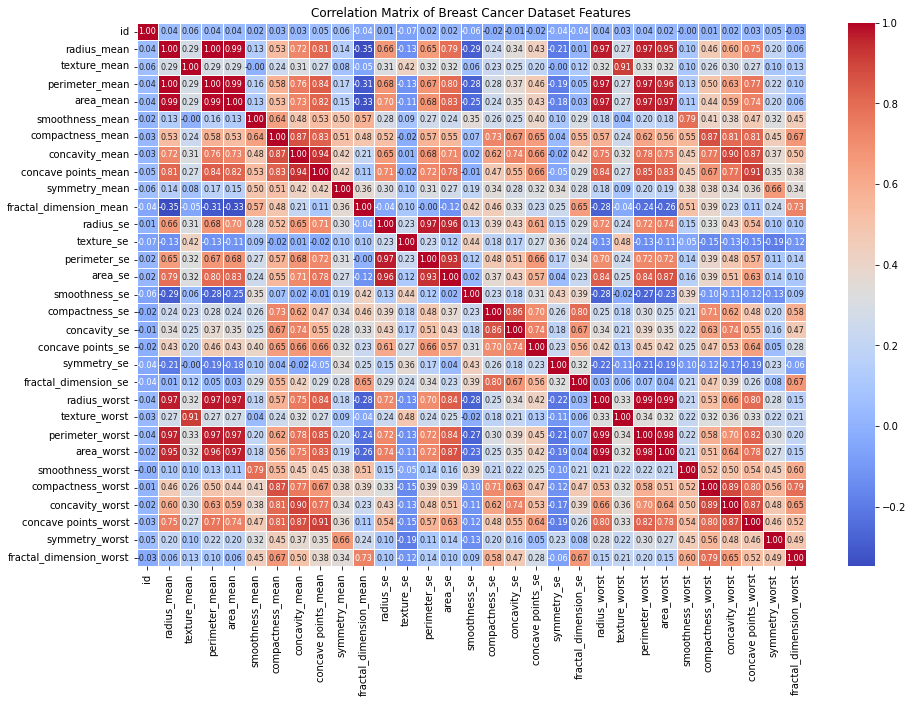

In [206]:
# Load the cleaned breast cancer dataset
cleaned_bcancer_df = pd.read_csv('cleaned_breast_cancer_data.csv')

# Create a correlation matrix
correlation_matrix = cleaned_bcancer_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1, annot_kws={"size": 8})
plt.title("Correlation Matrix of Breast Cancer Dataset Features")
plt.show()


### 4.1. Convert the categorical attribute to numerical values

In [207]:
# The variable 'diagnosis' has two classes: 'B' for Benign and 'M' for Malignant.
# Other variables are numerical, needing no type conversion. We'll begin by examining the class distribution of 'diagnosis'.

# Visualizing class distribution
class_counts = cleaned_bcancer_df['diagnosis'].value_counts()

# Creating a pie chart using Plotly
fig = px.pie(
    class_counts,
    values=class_counts.values,
    names=class_counts.index,
    labels=class_counts.index,
    title='Distribution of Diagnosis',
    color=class_counts.index,  # Assign colors to different classes
    color_discrete_map={'Benign': '#FF9999', 'Malignant': '#66B2FF'},
)

# Updating layout for better appearance
fig.update_traces(textinfo='percent+label', pull=[0.1, 0])  # Pull first slice slightly
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=50),
    legend=dict(title='Diagnosis', orientation='h', y=1, yanchor='bottom', x=0.5, xanchor='center'),
)

# Show the interactive plot
fig.show()

# Counting observations in each class
benign_count, malignant_count = cleaned_bcancer_df['diagnosis'].value_counts()
print('Count of cells labeled as Benign: ', benign_count)
print('Count of cells labeled as Malignant: ', malignant_count)
print('')
print('Percentage of cells labeled Benign: ', round(benign_count / len(cleaned_bcancer_df) * 100, 2), '%')
print('Percentage of cells labeled Malignant: ', round(malignant_count / len(cleaned_bcancer_df) * 100, 2), '%')

Count of cells labeled as Benign:  313
Count of cells labeled as Malignant:  151

Percentage of cells labeled Benign:  67.46 %
Percentage of cells labeled Malignant:  32.54 %


In [208]:
#'M' stands for Malignant and 'B' stands for Benign
# Encode the target variable
label_encoder = LabelEncoder()
cleaned_bcancer_df['diagnosis_encoded'] = label_encoder.fit_transform(cleaned_bcancer_df['diagnosis'])

# Drop unnecessary columns
X = cleaned_bcancer_df.drop(['diagnosis', 'diagnosis_encoded'], axis=1)
y = cleaned_bcancer_df['diagnosis_encoded']

# Identify numerical and categorical columns dynamically
numerical_columns = X.select_dtypes(include=['number']).columns.tolist()
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# Create transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a preprocessor that applies the appropriate transformers to each column
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])



### 4.2. Split dataset to 80% training and 20% testing data. What theory you are using for splitting the dataset.

### Answer:

I employed scikit-learn's train_test_split function to divide the dataset into training and testing sets, following the well-established "train-test split" or "holdout method" commonly used in machine learning to assess model performance.

This split results in two subsets: the training set, utilized for training the machine learning model, and the testing set, employed to evaluate the model's performance on data it hasn't seen before. To ensure consistency in the split, I set the random_state parameter to 40.

In my example, I designated 20% of the data for the testing set by specifying a test_size of 0.2, leaving the remaining 80% for training. This approach mimics the model's behavior on real-world, unseen data and offers a more realistic evaluation of its generalization capabilities.

In essence, the train-test split is a crucial step in evaluating a model's performance and identifying potential problems such as overfitting. It enables an impartial assessment of the model on new, unseen data, facilitating more informed decisions about its effectiveness.
    
   ### I applied the SelectKBest method using the F-statistic (f_classif) as the statistical test. The objective was to identify the top 15 features in the dataset, chosen for their strong correlation with the target variable. I subsequently trained my model using these selected features.

In [209]:
# Apply feature selection using Pearson correlation
selector = SelectKBest(f_classif, k=15)
X_selected = selector.fit_transform(X, y)

# Print selected features and their scores
selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_
print("Selected Features:", selected_features)
print("Feature Scores:", feature_scores)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=40)

Selected Features: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se',
       'area_se', 'radius_worst', 'perimeter_worst', 'area_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')
Feature Scores: [2.31059599e-01 5.65288443e+02 8.32672417e+01 6.10916579e+02
 5.82038328e+02 5.29651030e+01 2.54630390e+02 6.00569966e+02
 7.66477364e+02 4.54675854e+01 1.41755814e+00 3.05938579e+02
 4.07965615e-02 2.81953051e+02 4.36267391e+02 2.64200760e+00
 4.33016083e+01 7.73455593e+01 1.12971486e+02 7.36898936e+00
 6.55392048e+00 7.93864039e+02 1.04615208e+02 8.22519040e+02
 7.42138226e+02 8.85449562e+01 2.28939330e+02 4.09226701e+02
 7.11872724e+02 7.97918306e+01 5.19037797e+01]


### 4.3. Create a model using A (ONE) classification algorithm of your choice

### Answer:
	Random Forest Algorithm

In [210]:
# Create a Random Forest classifier and train the model with selected features
rf_model_selected_features = RandomForestClassifier(random_state=42)

# Train the Random Forest model with selected features
rf_model_selected_features.fit(X_train, y_train)

# Make predictions on the testing data
predictions_selected_features = rf_model_selected_features.predict(X_test)

print(predictions_selected_features[:10])

predictions_nominal = [ "M" if x < 0.5 else "B" for x in predictions_selected_features]
predictions_nominal[:10]

[1 0 1 1 0 1 0 0 0 0]


['B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M']

### 4.4. Visualize the model outputs, add the figures to your report, and describe what each figure illustrates.

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        59
           1       0.97      0.88      0.92        34

    accuracy                           0.95        93
   macro avg       0.95      0.93      0.94        93
weighted avg       0.95      0.95      0.95        93



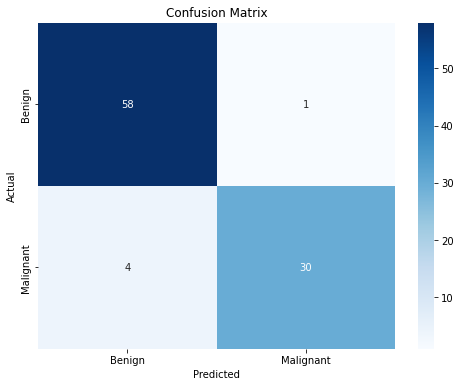

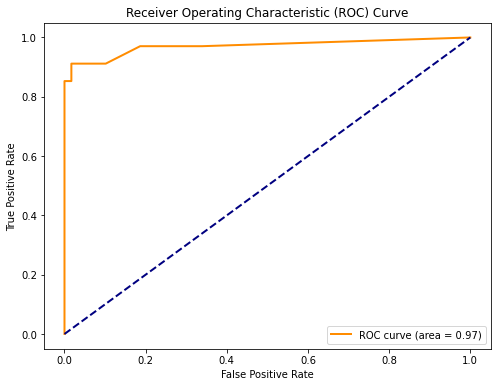

In [211]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, predictions_selected_features)
classification_rep = classification_report(y_test, predictions_selected_features)

# Print and visualize the classification report
print("Classification Report:\n", classification_rep)

# Visualize the confusion matrix
labels = ['Benign', 'Malignant']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Calculate the probabilities for the positive class
y_probabilities = rf_model_selected_features.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_probabilities) 
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### 5.1. Evaluate the performance of the model using at least 2 metrics.

In [212]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions_selected_features)
conf_matrix = confusion_matrix(y_test, predictions_selected_features)
class_report = classification_report(y_test, predictions_selected_features)

# Display evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.95

Confusion Matrix:
[[58  1]
 [ 4 30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        59
           1       0.97      0.88      0.92        34

    accuracy                           0.95        93
   macro avg       0.95      0.93      0.94        93
weighted avg       0.95      0.95      0.95        93



### 5.2. Describe each metric and explain why you chose it.

### 1. Accuracy:

Accuracy is a common metric that represents the ratio of correctly predicted instances to the total instances. It is calculated using the formula:

	Accuracy = (Number of Correct Predictions / Total Number of Predictions)

**Why it's chosen:**
Accuracy provides a general overview of the model's correctness. It's a straightforward metric and is easy to interpret. However, accuracy alone may not be sufficient in situations where the classes are imbalanced. For example, if one class is rare, a model that predicts the majority class for all instances could still achieve a high accuracy, but it wouldn't be useful.

### 2. Confusion Matrix:

A confusion matrix is a table that summarizes the performance of a classification algorithm. It has four entries:

- True Positive (TP): Instances correctly predicted as positive.
- True Negative (TN): Instances correctly predicted as negative.
- False Positive (FP): Instances incorrectly predicted as positive (Type I error).
- False Negative (FN): Instances incorrectly predicted as negative (Type II error).

**Why it's chosen:**
The confusion matrix provides a more detailed view of the model's performance by breaking down correct and incorrect predictions. It is especially useful in understanding the types of errors the model is making, which can be crucial in certain applications.

### 3. Classification Report:

The classification report includes several metrics for each class, including precision, recall, and F1-score.

- Precision: The ratio of true positive predictions to the total predicted positives.
- Recall (Sensitivity): The ratio of true positive predictions to the total actual positives.
- F1-score: The harmonic mean of precision and recall, providing a balanced measure.

**Why it's chosen:**
The classification report gives a comprehensive view of the model's performance for each class. Precision and recall provide insights into the trade-off between false positives and false negatives. F1-score balances precision and recall, making it useful when there is an uneven class distribution.

In summary, these metrics collectively offer a nuanced understanding of the model's performance, helping to identify areas where the model excels and areas where it may need improvement.

### 5.3. Visualize the outputs on examining the test dataset, add the figures into your report, and describe what each figure illustrates.

Accuracy: 0.946236559139785

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        59
           1       0.97      0.88      0.92        34

    accuracy                           0.95        93
   macro avg       0.95      0.93      0.94        93
weighted avg       0.95      0.95      0.95        93


Confusion Matrix:
 [[58  1]
 [ 4 30]]
True Positives: 30
True Negatives: 58
False Positives: 1
False Negatives: 4
Percentage of Correct Predictions: 94.62%


<Figure size 864x288 with 0 Axes>

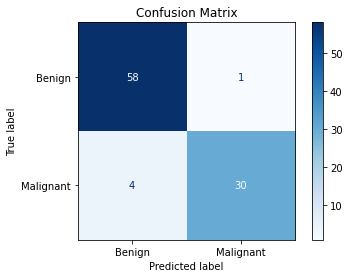

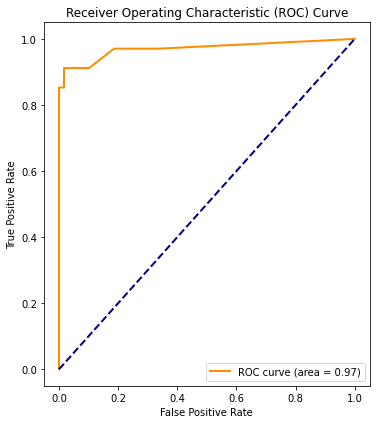

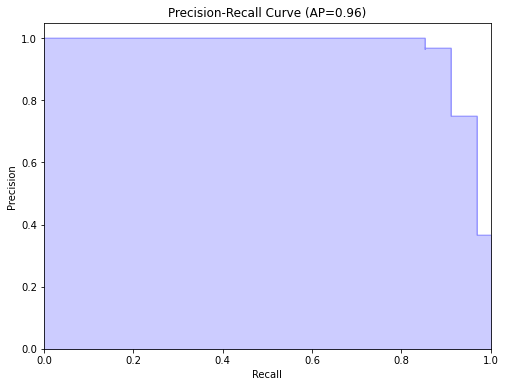

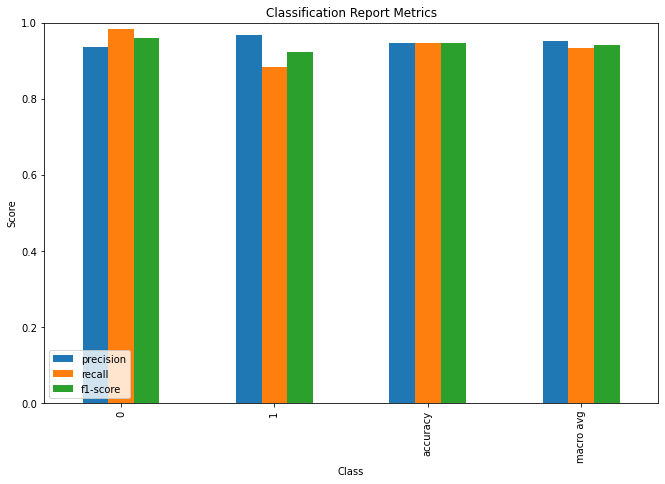

In [213]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions_selected_features)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, predictions_selected_features))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions_selected_features))

# Calculate true positives, true negatives, false positives, and false negatives
true_positives = sum((predictions_selected_features == 1) & (y_test == 1))
true_negatives = sum((predictions_selected_features == 0) & (y_test == 0))
false_positives = sum((predictions_selected_features == 1) & (y_test == 0))
false_negatives = sum((predictions_selected_features == 0) & (y_test == 1))

# Calculate the percentage of correct predictions
correct_predictions_percentage = (true_positives + true_negatives) / len(y_test) * 100

print(f"True Positives: {true_positives}")
print(f"True Negatives: {true_negatives}")
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")
print(f"Percentage of Correct Predictions: {correct_predictions_percentage:.2f}%")

# Display the confusion matrix plot
labels = ['Benign', 'Malignant']
plt.figure(figsize=(12, 4))
confusion_matrix_display = plot_confusion_matrix(rf_model_selected_features, X_test, y_test, cmap=plt.cm.Blues, values_format='d')
confusion_matrix_display.ax_.set_xticklabels(labels)
confusion_matrix_display.ax_.set_yticklabels(labels)
plt.title('Confusion Matrix')
plt.show()

# Display the ROC curve plot
y_probabilities = rf_model_selected_features.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Display the Precision-Recall curve plot
precision, recall, _ = precision_recall_curve(y_test, y_probabilities)
average_precision = average_precision_score(y_test, y_probabilities)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve (AP={:.2f})'.format(average_precision))
plt.show()


# Bar chart for Classification Report metrics
metrics_df = pd.DataFrame(classification_report(y_test, predictions_selected_features,output_dict=True)).transpose().iloc[:-1, :3]
metrics_df.plot(kind='bar', figsize=(11, 7))
plt.title('Classification Report Metrics')
plt.ylabel('Score')
plt.xlabel('Class')
plt.ylim([0, 1])
plt.legend(loc='lower left')
plt.show()


### 6.1. Were any attributes dropped from the data set as non-predictors? If so,which ones and why do you think they weren’t effective predictors?

### Answer:
	
    Yes, there were many attributes dropped from the data set as non-predictors. The reasons are:
    
    15 attributes were seected for the feature selection and 17 were dropped. The dropped attributes are as followed:  
    
    1. id
    2. diagnosis
    3. texture_mean
    4. smoothness_mean
    5. fractal_dimension_mean
    6. texture_se
    7. smoothness_se
    8. compactness_se
    9. concavity_se
    10. concave points_se
    11. symmetry_se
    12. fractal_dimension_se
    13. smoothness_worst
    14. compactness_worst
    15. concavity_worst
    16. symmetry_worst
    17. fractal_dimension_worst
    
Why do I think these 17 attributes are not effective predictors:
    
1. id: Generally, identifiers like "id" are unique for each data point and are unlikely to contribute useful information for predictive modeling.
    
2. diagnosis: This feature represents the diagnosis outcome, and if the goal is to predict the diagnosis itself, using it as a predictor would lead to data leakage. In most cases,diagnosis as a predictor when predicting the diagnosis is not used.

3. texture_mean, smoothness_mean, fractal_dimension_mean, texture_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se: These features have been found to have low correlation or low discriminatory power, suggesting that they do not strongly influence the prediction of the target variable.

4. smoothness_worst, compactness_worst, concavity_worst, symmetry_worst, fractal_dimension_worst: Similar to the above, these features have been identified as having low correlation or low discriminatory power in the context of the specific machine learning problem.
